In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib

from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea)

df = pd.read_csv('Steamed Hams M+ Scores.csv').sort_values(['char_name','score'], ascending=False)
df['spec_cumulative'] =  df.groupby('char_name').cumcount()

#Subset - two specs, remove any with 0 score
df = df[df.score > 0]
df = df[df.spec_cumulative <= 1]

spec_df = pd.read_csv('spec_df.csv').set_index(['class','spec_name'])
df = df.join(spec_df, on=['class','spec_name'])

df

,Unnamed: 0,class,spec_n,char_name,score,spec_name,spec_short2,spec_short,spec_cumulative,id,spec_media,spec_image
71,71,Evoker,spec_1,Scaleyoda,512.0,Preservation,PVOKE,Prevoker,0,1468,https://render.worldofwarcraft.com/us/icons/56...,pres_evoker.jpg
75,75,Evoker,spec_2,Scaleyoda,312.9,Augmentation,AUG,Augvoker,1,1473,https://render.worldofwarcraft.com/us/icons/56...,aug_evoker.jpg
233,233,Shaman,spec_2,Omgwtfhaxx,157.5,Restoration,RESTO,Resto,0,264,https://render.worldofwarcraft.com/us/icons/56...,resto_shaman.jpg
223,223,Shaman,spec_1,Oda,1445.8,Enhancement,ENH,Enh,0,263,https://render.worldofwarcraft.com/us/icons/56...,enh_shaman.jpg
214,214,Shaman,spec_0,Oda,196.4,Elemental,ELE,Ele,1,262,https://render.worldofwarcraft.com/us/icons/56...,ele_shaman.jpg
256,256,Warrior,spec_1,Jackrum,365.2,Fury,FURY,Fury,0,72,https://render.worldofwarcraft.com/us/icons/56...,fury_warrior.jpg
162,162,Paladin,spec_1,Itsarchy,180.0,Protection,PROT,Prot,0,66,https://render.worldofwarcraft.com/us/icons/56...,prot_paladin.jpg
150,150,Paladin,spec_0,Itsarchy,165.0,Holy,HPAL,HPal,1,65,https://render.worldofwarcraft.com/us/icons/56...,holy_paladin.jpg
160,160,Paladin,spec_1,Holysoggy,684.5,Protection,PROT,Prot,0,66,https://render.worldofwarcraft.com/us/icons/56...,prot_paladin.jpg
118,118,Mage,spec_1,Fxs,209.1,Fire,FIRE,Fire,0,63,https://render.worldofwarcraft.com/us/icons/56...,fire_mage.jpg


In [7]:
df_agg = df[df.score > 0].groupby(['char_name','class'], as_index=False).agg(
    score_list=('score',list),
    spec_list=('spec_short',list),
    spec_image=('spec_image',list))
df_agg['Total'] = df_agg['score_list'].apply(lambda x : sum(x))
df_agg['score_list'] =  df_agg['score_list'].apply(lambda x :[0] + x)
df_agg['score_cml'] =  df_agg['score_list'].apply(lambda x : np.cumsum(x))
df_agg.sort_values('Total', inplace=True, ascending=False)
df_agg = df_agg.reset_index().head(10)
df_agg

,index,char_name,class,score_list,spec_list,spec_image,Total,score_cml
0,10,Oda,Shaman,"[0, 1445.8, 196.4]","[Enh, Ele]","[enh_shaman.jpg, ele_shaman.jpg]",1642.2,"[0.0, 1445.8, 1642.2]"
1,5,Eesow,Monk,"[0, 1508.0]",[WW],[ww_monk.jpg],1508.0,"[0.0, 1508.0]"
2,3,Dingboy,Priest,"[0, 675.1, 172.5]","[Shadow, Disc]","[shadow_priest.jpg, Disc_Priest.jpg]",847.6,"[0.0, 675.1, 847.6]"
3,12,Scaleyoda,Evoker,"[0, 512.0, 312.9]","[Prevoker, Augvoker]","[pres_evoker.jpg, aug_evoker.jpg]",824.9,"[0.0, 512.0, 824.9]"
4,1,Brakyn,Hunter,"[0, 684.5]",[BM],[BM_Hunter.jpg],684.5,"[0.0, 684.5]"
5,7,Holysoggy,Paladin,"[0, 684.5]",[Prot],[prot_paladin.jpg],684.5,"[0.0, 684.5]"
6,4,Eesod,Death Knight,"[0, 668.6]",[Blood],[blood_dk.jpg],668.6,"[0.0, 668.6]"
7,2,Detoxs,Mage,"[0, 526.1]",[Frost],[frost_mage.jpg],526.1,"[0.0, 526.1]"
8,9,Jackrum,Warrior,"[0, 365.2]",[Fury],[fury_warrior.jpg],365.2,"[0.0, 365.2]"
9,0,Bellfulgur,Shaman,"[0, 355.7]",[Resto],[resto_shaman.jpg],355.7,"[0.0, 355.7]"


In [8]:
# Set Class Colour Schemes

class_colours = {
    'Monk':['#00FF98','#6effae'],
    'Death Knight':['#c41e3a','#d65960'],
    'Demon Hunter':['#A330C9','#b762d6'],
    'Druid':['#FF7C0A','#ff9957'],
    'Evoker':['#33937F','#4d9e8b'],
    'Hunter':['#AAD372','#b2d881'],
    'Mage':['#3FC7EB','#5ccded'],
    'Paladin':['#F48CBA','#f698c1'],
    'Priest':['#FFFFFF','#FFFFFF'],
    'Rogue':['#FFF468','#fff78e'],
    'Shaman':['#0070DD','#2e80e2'],
    'Warlock':['#8788EE','#9294f1'],
    'Warrior':['#C69B6D','#cca57c']}

In [9]:
df_agg['colours'] = df_agg['class'].map(class_colours)
df_agg

,index,char_name,class,score_list,spec_list,spec_image,Total,score_cml,colours
0,10,Oda,Shaman,"[0, 1445.8, 196.4]","[Enh, Ele]","[enh_shaman.jpg, ele_shaman.jpg]",1642.2,"[0.0, 1445.8, 1642.2]","[#0070DD, #2e80e2]"
1,5,Eesow,Monk,"[0, 1508.0]",[WW],[ww_monk.jpg],1508.0,"[0.0, 1508.0]","[#00FF98, #6effae]"
2,3,Dingboy,Priest,"[0, 675.1, 172.5]","[Shadow, Disc]","[shadow_priest.jpg, Disc_Priest.jpg]",847.6,"[0.0, 675.1, 847.6]","[#FFFFFF, #FFFFFF]"
3,12,Scaleyoda,Evoker,"[0, 512.0, 312.9]","[Prevoker, Augvoker]","[pres_evoker.jpg, aug_evoker.jpg]",824.9,"[0.0, 512.0, 824.9]","[#33937F, #4d9e8b]"
4,1,Brakyn,Hunter,"[0, 684.5]",[BM],[BM_Hunter.jpg],684.5,"[0.0, 684.5]","[#AAD372, #b2d881]"
5,7,Holysoggy,Paladin,"[0, 684.5]",[Prot],[prot_paladin.jpg],684.5,"[0.0, 684.5]","[#F48CBA, #f698c1]"
6,4,Eesod,Death Knight,"[0, 668.6]",[Blood],[blood_dk.jpg],668.6,"[0.0, 668.6]","[#c41e3a, #d65960]"
7,2,Detoxs,Mage,"[0, 526.1]",[Frost],[frost_mage.jpg],526.1,"[0.0, 526.1]","[#3FC7EB, #5ccded]"
8,9,Jackrum,Warrior,"[0, 365.2]",[Fury],[fury_warrior.jpg],365.2,"[0.0, 365.2]","[#C69B6D, #cca57c]"
9,0,Bellfulgur,Shaman,"[0, 355.7]",[Resto],[resto_shaman.jpg],355.7,"[0.0, 355.7]","[#0070DD, #2e80e2]"


In [10]:
# Chart Generation

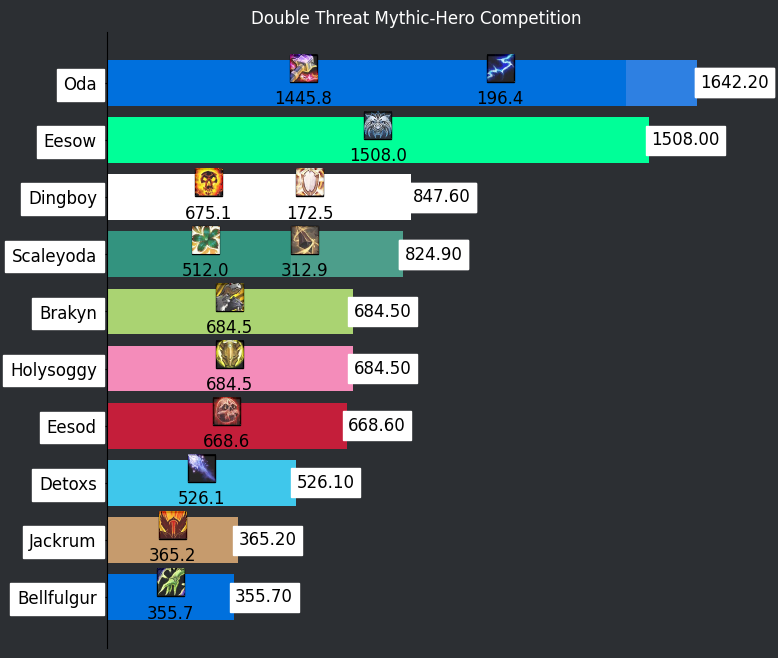

In [26]:
# Chart Generation
def barGen(df=df_agg):
    fig, ax = plt.subplots(figsize=(8,8))
    fig.set_facecolor('#2c2f33')
    ax.set_facecolor('#2c2f33')
    for i in df.index:
        score_length = len(df.loc[i]['score_list'])
        for score_idx in range(1,len(df.loc[i]['score_list'])):
            char_name = df.loc[i]['char_name']
            bar_height = df.loc[i]['score_list'][score_idx]
            color = df.loc[i]['colours'][score_idx-1]
            left = df.loc[i]['score_cml'][score_idx-1]
            spec = df.loc[i]['spec_list'][score_idx-1]
            score = df.loc[i]['score_list'][score_idx]
            spec_image = df.loc[i]['spec_image'][score_idx-1]

            total = df.loc[i]['Total']

            ax.barh(char_name,
                    bar_height,
                    color=color,
                    left=left,
                    #edgecolor='#2c2f33', linewidth=0.1
                    )
            
            plt.text(total * (score_idx/score_length), i+0.1,
                     f'\n{score}', ha='center', va='center', fontsize='large'#, backgroundcolor='white', alpha=0.5#,fontweight='bold'
                     ) #)
            plt.text(total*1.005, i,f'{total:.2f}', ha='left', va='center', fontsize='large', backgroundcolor="white") #Total Score
            
            a = Image.open(f'images/{spec_image}')
            imagebox = OffsetImage(a, zoom=0.35, alpha=0.85)
            #imagebox.image.axes = ax

            xy = (total * (score_idx/score_length), i-0.25)

            ab = AnnotationBbox(imagebox,
                                xy,
                                xycoords='data',
                                boxcoords="data",
                                pad=0)

            ax.add_artist(ab)

            #ax.figure.figimage(a,x0,y0)

            #plt.text(df.loc[i]['Total']*(score/len(df.loc[i]['score_list'])),i,
            #         #f'{df.loc[i]['spec_list'][score]}\n{df.loc[i]['score_list'][score]}',
            #         f'{1}'
            #         ha='center', va='center', fontsize='large', #fontweight='bold') #Spec 0 score

    plt.gca().invert_yaxis()
    plt.gca().set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    plt.title('Double Threat Mythic-Hero Competition', color='white')

    plt.setp(ax.get_yticklabels(), backgroundcolor="white", fontsize='large')



    plt.savefig('double_threat.png', bbox_inches='tight')

barGen()



In [6]:
def barGen(class_name, scores, colors, specs, total, y_pos):
    ax.barh(class_name, scores[0], color=colors[0], left=0, edgecolor='#2c2f33', linewidth=0.1) #Spec 0 Bar 
    ax.barh(class_name, scores[1], color=colors[1], left=scores[0], edgecolor='#2c2f33', linewidth=0.1) #Spec 1 Bar

    plt.text(total*(1/3), y_pos, f'{specs[0]}\n{scores[0]}', ha='center', va='center', fontsize='large', #fontweight='bold'
             ) #Spec 0 score
    plt.text(total*(2/3), y_pos,f'{specs[1]}\n{scores[1]}', ha='center', va='center', fontsize='large', #fontweight='bold'
             ) #Spec 1 Score
    plt.text((scores[0]+scores[1])*1.01, y_pos,f'{round(total,2)}', ha='left', va='center', fontsize='large', backgroundcolor="white") #Total Score

    #plt.text(scores[0]/2, y_pos, f'{specs[0]}\n{scores[0]}', ha='center', va='center', fontsize='medium', fontweight='bold'
    #         ) #Spec 0 score
    #plt.text(scores[0]+scores[1]/2, y_pos,f'{specs[1]}\n{scores[1]}', ha='center', va='center', fontsize='medium', fontweight='bold'
    #         ) #Spec 1 Score
    #plt.text((scores[0]+scores[1])*1.01, y_pos,f'{round(total,2)}', ha='left', va='center', fontsize='medium', backgroundcolor="white") #Total Score

In [7]:
4968.0 * (1/3)

1656.0

### Set the plt text marks at thirds to open up more flexibility on text size

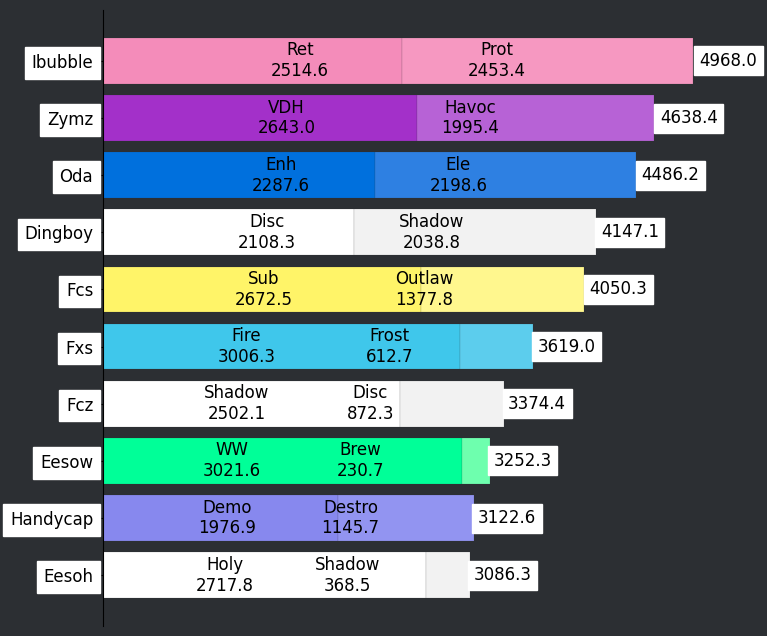

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor('#2c2f33')
ax.set_facecolor('#2c2f33')
ax.yaxis.label.set_color('red')

#plt.title('Steamed Hams Double Threat Competition\n3 November 2023', color='white')

for i in df_agg.index:
    barGen(df_agg.loc[i]['char_name'],
           scores=df_agg.loc[i]['score_list'],
           colors=df_agg.loc[i]['colours'],
           specs=df_agg.loc[i]['spec_list'],
           total=df_agg.loc[i]['Total'],
           y_pos=i)
    
plt.gca().invert_yaxis()
plt.gca().set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)



plt.setp(ax.get_yticklabels(), backgroundcolor="white", fontsize='large')

plt.savefig('double_threat.png', bbox_inches='tight')